In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
df=pd.read_csv("housing_in_london_yearly_variables.csv")

In [13]:
df.dtypes

code                  object
area                  object
date                  object
median_salary        float64
life_satisfaction    float64
mean_salary           object
recycling_pct         object
population_size      float64
number_of_jobs       float64
area_size            float64
no_of_houses         float64
borough_flag           int64
dtype: object

In [65]:

df['population_size'].fillna(df['population_size'].mean(),inplace=True)
df['number_of_jobs'].fillna(df['number_of_jobs'].mean(),inplace=True)
df['area_size'].fillna(df['area_size'].mean(),inplace=True)
df['no_of_houses'].fillna(df['no_of_houses'].mean(),inplace=True)

In [30]:
df.head(1)

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,life_Satisfaction
0,E09000001,city of london,1999-12-01,33020.0,7.485057,48922,0,6581.0,3.188095e+06,372490.27027,881468.15015,1,7.485057


In [36]:
df.drop('life_satisfaction',axis=1,inplace=True)

In [38]:
df.head(1)

,code,area,date,median_salary,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,life_Satisfaction
0,E09000001,city of london,1999-12-01,33020.0,48922,0,6581.0,3.188095e+06,372490.27027,881468.15015,1,7.485057


In [43]:
df['mean_salary']=df.mean_salary.str.replace('#','0')
df['mean_salary']=df.mean_salary.str.replace('-','0')

In [55]:
df['mean_salary']=df.mean_salary.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
code                 1071 non-null object
area                 1071 non-null object
date                 1071 non-null object
median_salary        1049 non-null float64
mean_salary          1071 non-null float64
recycling_pct        860 non-null object
population_size      1071 non-null float64
number_of_jobs       1071 non-null float64
area_size            1071 non-null float64
no_of_houses         1071 non-null float64
borough_flag         1071 non-null int64
life_Satisfaction    1071 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 100.5+ KB


In [101]:
df.drop(columns=['median_salary','recycling_pct'],inplace=True)

In [105]:
df.shape

(1071, 10)

In [326]:
df['area'] = pd.factorize(df.area)[0]
df['area'] = df['area'].astype("float")

In [116]:
df.head(1)

,code,area,date,mean_salary,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,life_Satisfaction
0,E09000001,0.0,1999-12-01,48922.0,6581.0,3.188095e+06,372490.27027,881468.15015,1,7.485057


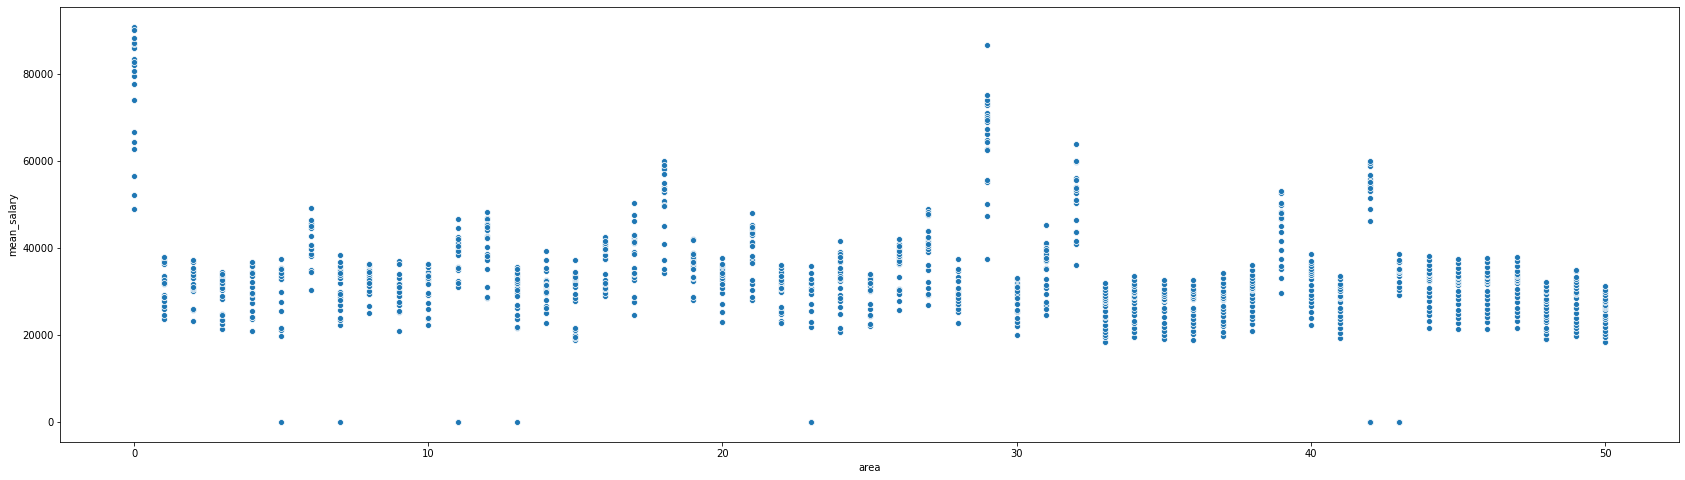

In [117]:
fig = plt.figure(figsize=(29,8))
sns.scatterplot(x=df['area'], y=df['mean_salary'],data=df)

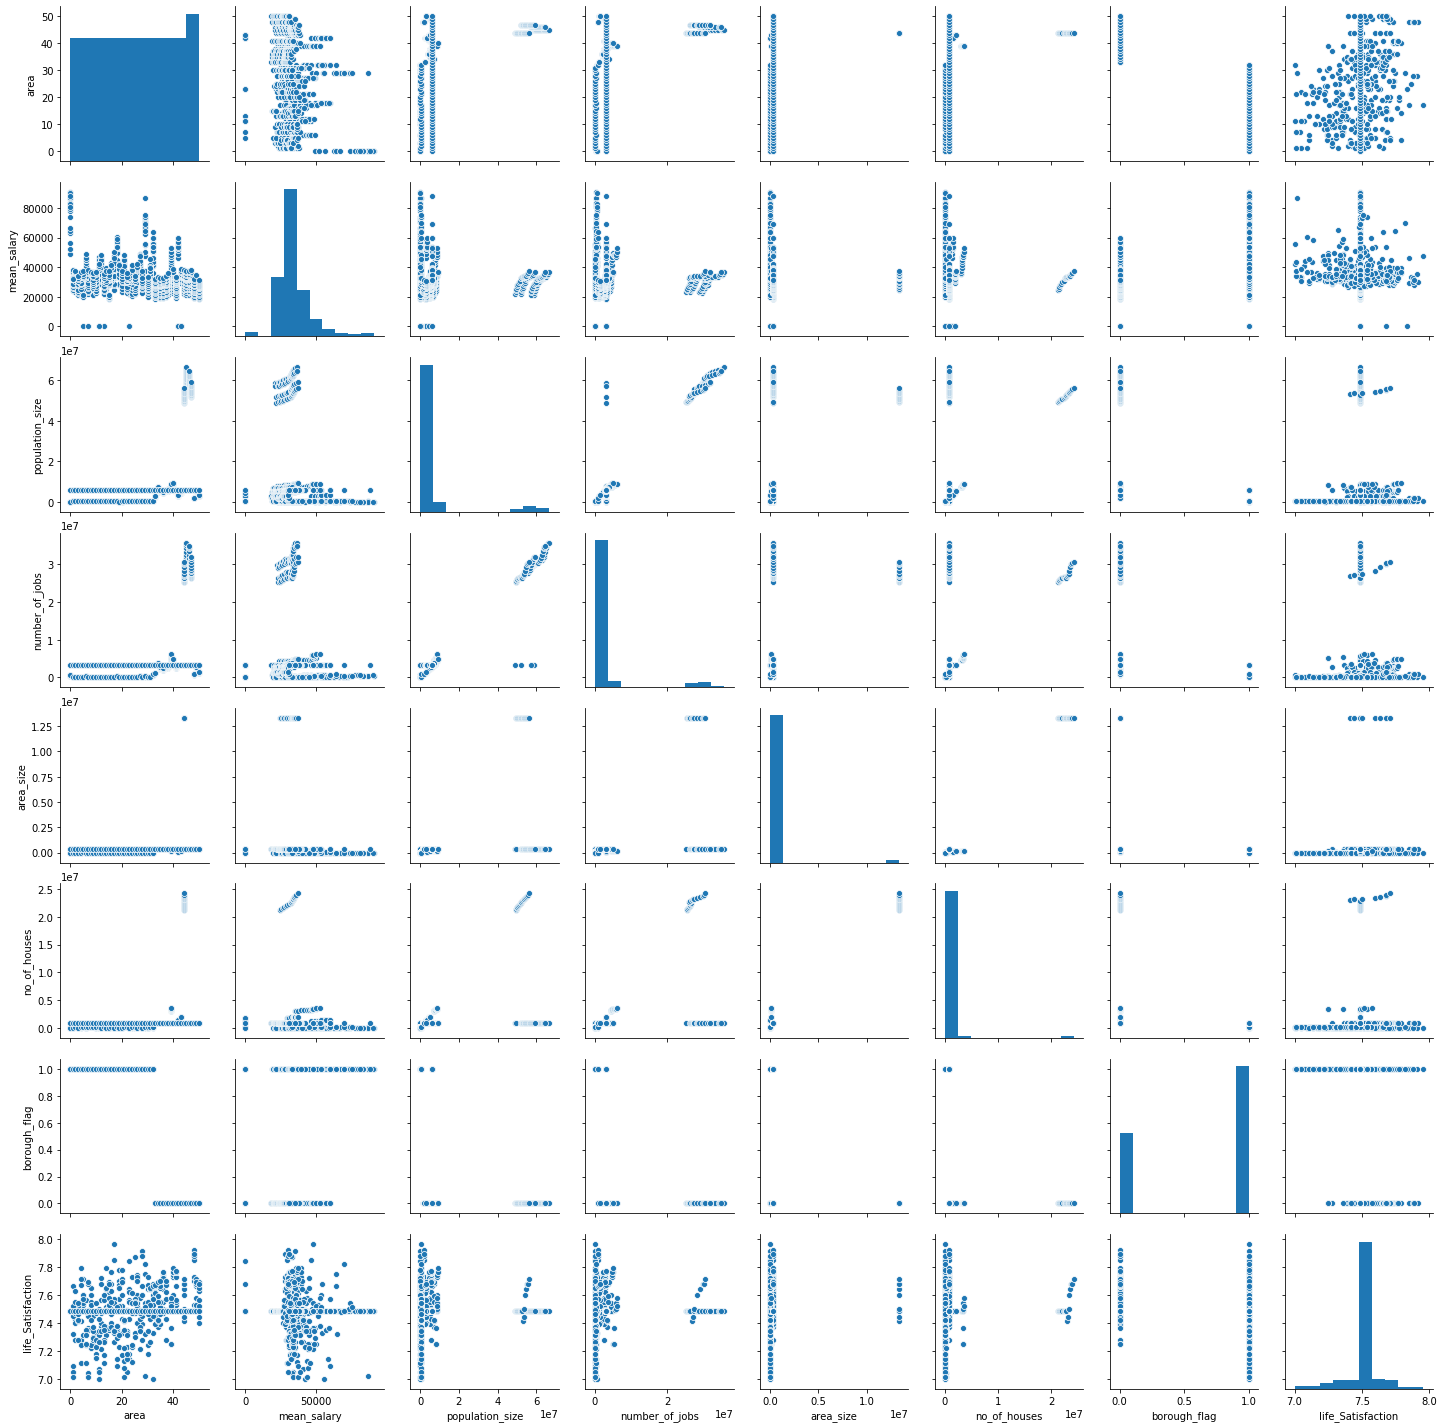

In [118]:
sns.pairplot(df)

In [210]:
df.head(1)

,code,area,date,mean_salary,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,life_Satisfaction
0,E09000001,0.0,1999-12-01,48922.0,6581.0,3.188095e+06,372490.27027,881468.15015,1,7.485057


In [273]:
X=df[['area', 'population_size', 'number_of_jobs']]
y=df['mean_salary']

In [274]:
from sklearn.model_selection import train_test_split

In [283]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=101)

In [314]:
from sklearn.tree import DecisionTreeClassifier

In [315]:
dtree=DecisionTreeClassifier()

In [316]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [330]:
 predic=dtree.predict(X_test)

In [331]:
from sklearn.metrics import r2_score

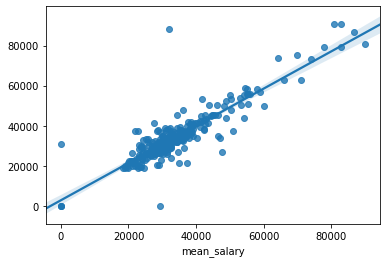

In [320]:
sns.regplot(x=y_test, y=predic, data=df)

In [332]:
r2_score(y_test,predic)

0.7640990362555361